## DataRobot Python API Training

Notebook #0 - Intro.

raul.arrabales@datarobot.com

**Documentation**
- [Python API Docs](https://datarobot-public-api-client.readthedocs-hosted.com/)
- [Python samples](https://github.com/datarobot-community/examples-for-data-scientists)
- [DR Community Tutorials](https://github.com/datarobot-community/tutorials-for-data-scientists)

### Setup

**Data Set**
- Readmissions Data set (https://s3.amazonaws.com/datarobot_public_datasets/10k_diabetes.csv)
- [Public S3 bucket](https://s3.amazonaws.com/datarobot_public_datasets/10k_diabetes.csv)

In [13]:
url_to_data = "https://s3.amazonaws.com/datarobot_public_datasets/10k_diabetes.csv" 
url_to_scoring_data = 'https://s3.amazonaws.com/datarobot_public_datasets/10k_diabetes_scoring.csv'

**Libraries**

In [1]:
import datarobot as dr
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

**Connect to DataRobot Managed Cloud**

In [3]:
credentials_File = 'drconfig.yaml'

dr.Client(config_path=credentials_File)

### Create Projects

**Create a new project (default settings)**
- Default settings 
- Autopilot
- Using all available workers

In [5]:
project = dr.Project.start(sourcedata = url_to_data,
                           project_name = '21Oct2021_RAM_PyAPI_00_Introduction',
                           target = 'readmitted',
                           worker_count = -1)

project.wait_for_autopilot()

In progress: 20, queued: 19 (waited: 0s)
In progress: 20, queued: 19 (waited: 3s)
In progress: 20, queued: 19 (waited: 5s)
In progress: 20, queued: 19 (waited: 8s)
In progress: 20, queued: 19 (waited: 12s)
In progress: 20, queued: 19 (waited: 17s)
In progress: 20, queued: 19 (waited: 22s)
In progress: 20, queued: 19 (waited: 31s)
In progress: 20, queued: 18 (waited: 46s)
In progress: 20, queued: 18 (waited: 70s)
In progress: 19, queued: 11 (waited: 92s)
In progress: 19, queued: 4 (waited: 115s)
In progress: 20, queued: 0 (waited: 137s)
In progress: 18, queued: 0 (waited: 159s)
In progress: 17, queued: 0 (waited: 180s)
In progress: 12, queued: 0 (waited: 202s)
In progress: 11, queued: 0 (waited: 224s)
In progress: 6, queued: 0 (waited: 246s)
In progress: 3, queued: 0 (waited: 267s)
In progress: 2, queued: 0 (waited: 288s)
In progress: 2, queued: 0 (waited: 309s)
In progress: 0, queued: 0 (waited: 331s)
In progress: 19, queued: 0 (waited: 352s)
In progress: 19, queued: 0 (waited: 373s)
I

**Create a new project (custom settings)**
- 20% holdout partition
- 3-Fold cross-validation
- Optimization metric: AUC

In [ ]:
partitioning = dr.StratifiedCV(holdout_pct = 20, reps = 3)

c_project = dr.Project.start(sourcedata = url_to_data,
                           project_name = '21Oct2021_RAM_PyAPI_00_Introduction_with_custom_settings',
                           target = 'readmitted',
                           metric = 'AUC',
                           worker_count = 1,
                           partitioning_method = partitioning)

In [ ]:
c_project.wait_for_autopilot()

### Insights from a finished project

**Get trained models**

In [7]:
# Project 1 models
project.get_models()[0:10]

[Model('Advanced AVG Blender'),
 Model('AVG Blender'),
 Model('ENET Blender'),
 Model('Light Gradient Boosting on ElasticNet Predictions '),
 Model('ENET Blender'),
 Model('Elastic-Net Classifier (mixing alpha=0.5 / Binomial Deviance)'),
 Model('Regularized Logistic Regression (L2)'),
 Model('Nystroem Kernel SVM Classifier'),
 Model('Elastic-Net Classifier (mixing alpha=0.5 / Binomial Deviance)'),
 Model('Elastic-Net Classifier (mixing alpha=0.5 / Binomial Deviance)')]

In [8]:
# Project 2 models
c_project.get_models()[0:10]

[]

In [9]:
# Get most accurate model
most_accurate_model = project.get_models()[0]

# Get type of model
print(most_accurate_model.model_type)

Advanced AVG Blender


In [12]:
# Get most accurate model
# c_most_accurate_model = c_project.get_models()[0]

# Get type of model
# print(c_most_accurate_model.model_type)

**Get Feature Impact**

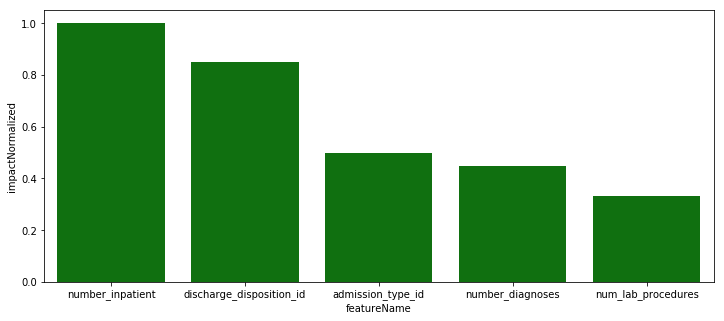

In [14]:
# Get Feature Impact
feature_impact = most_accurate_model.get_or_request_feature_impact()

# Save feature impact in pandas dataframe
fi_df = pd.DataFrame(feature_impact)

fig, ax = plt.subplots(figsize = (12,5))

#Plot feature impact
sns.barplot(x='featureName', y='impactNormalized', data=fi_df[0:5], color='g')

In [15]:
feature_impact

[{'featureName': 'number_inpatient',
  'impactNormalized': 1.0,
  'impactUnnormalized': 0.027839110712501447,
  'redundantWith': None},
 {'featureName': 'discharge_disposition_id',
  'impactNormalized': 0.8479059530917163,
  'impactUnnormalized': 0.02360494770190935,
  'redundantWith': None},
 {'featureName': 'admission_type_id',
  'impactNormalized': 0.4981629220693468,
  'impactUnnormalized': 0.013868412740351777,
  'redundantWith': None},
 {'featureName': 'number_diagnoses',
  'impactNormalized': 0.44823191952091535,
  'impactUnnormalized': 0.012478378032419801,
  'redundantWith': None},
 {'featureName': 'num_lab_procedures',
  'impactNormalized': 0.33016182854997644,
  'impactUnnormalized': 0.009191411698044716,
  'redundantWith': None},
 {'featureName': 'diag_2',
  'impactNormalized': 0.31919697147026593,
  'impactUnnormalized': 0.0088861598278559,
  'redundantWith': None},
 {'featureName': 'medical_specialty',
  'impactNormalized': 0.3094371807515625,
  'impactUnnormalized': 0.00

**Get ROC curve**

(0, 1)

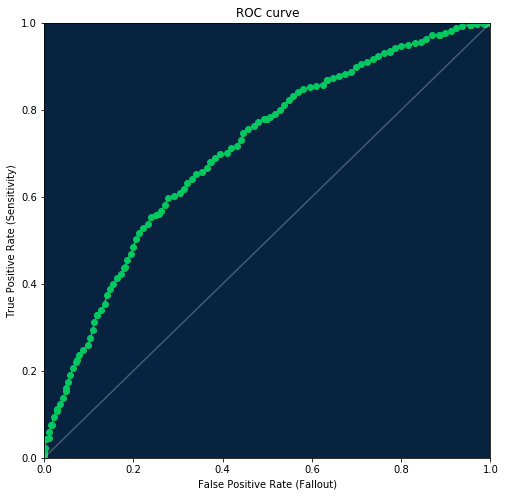

In [16]:
# ROC curve for validation partition
roc = most_accurate_model.get_roc_curve('validation')

# Save the result into a pandas dataframe
roc_df = pd.DataFrame(roc.roc_points)
roc_df.head()

dr_roc_green = '#03c75f'
white = '#ffffff'
dr_purple = '#65147D'
dr_dense_green = '#018f4f'
dr_dark_blue = '#08233F'

fig = plt.figure(figsize=(8, 8))
axes = fig.add_subplot(1, 1, 1, facecolor=dr_dark_blue)

plt.scatter(roc_df.false_positive_rate, roc_df.true_positive_rate, color=dr_roc_green)
plt.plot(roc_df.false_positive_rate, roc_df.true_positive_rate, color=dr_roc_green)
plt.plot([0, 1], [0, 1], color=white, alpha=0.25)
plt.title('ROC curve')
plt.xlabel('False Positive Rate (Fallout)')
plt.xlim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.ylim([0, 1])

### Model Deployment

**Get Prediction Server**
- Managed Cloud

In [17]:
prediction_server = dr.PredictionServer.list()[0]
print(prediction_server)

PredictionServer(https://mlops.dynamic.orm.datarobot.com)


**Create the deployment**

In [18]:
deployment = dr.Deployment.create_from_learning_model(
    most_accurate_model.id, label='21Oct2021_RAM_Readmissions', 
    description='API Trainig Readmissions deployment',
    default_prediction_server_id=prediction_server.id)

deployment

Deployment(21Oct2021_RAM_Readmissions)

### Model Scoring

**Using Batch Prediction API**

In [19]:
scoring = pd.read_csv(url_to_scoring_data, nrows=100)

scoring.to_csv('scoring.csv',index=False)

dr.BatchPredictionJob.score_to_file(
    deployment.id,
    'scoring.csv',
    './predicted.csv')

BatchPredictionJob(batchPredictions, '61717e67add6682b2a8e0340', status=INITIALIZING)